In [2]:
import requests
import json
from requests.adapters import HTTPAdapter, Retry
from dotenv import load_dotenv
from openai import OpenAI 
import os

In [3]:
load_dotenv()

True

In [4]:
MODEL="gpt-4o"
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

## Assistant using Text as prompt input

### Simple Limits problem to solve basic substituion should work 

In [5]:
completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"}, 
    {"role": "user", "content": "Hello! Evaluate the limit as x approaches 2 of the expression 8 - 3x + 12x^2 ?"}
  ]
)

print("Assistant: " + completion.choices[0].message.content)


Assistant: Sure! To evaluate the limit of the expression \( 8 - 3x + 12x^2 \) as \( x \) approaches 2, we can simply substitute \( x = 2 \) into the expression because it is a polynomial and continuous for all real numbers.

So, let's compute it step-by-step:

1. Substitute \( x = 2 \) into the expression:
   \[
   8 - 3(2) + 12(2)^2
   \]

2. Evaluate inside the parentheses:
   \[
   8 - 6 + 12(4)
   \]

3. Multiply the terms:
   \[
   8 - 6 + 48
   \]

4. Add and subtract in order:
   \[
   2 + 48 = 50
   \]

So, the limit as \( x \) approaches 2 of the expression \( 8 - 3x + 12x^2 \) is 50.


## Assistant using a URL picture of a problem to solve

In [25]:
import matplotlib.pyplot as plt
import re
from IPython.display import Image, display, Audio, Markdown
import base64
from PIL import Image
from io import BytesIO

IMAGE_PATH = 'https://qph.cf2.quoracdn.net/main-qimg-9a49a57343520888d309ee221db66e6a'

In [26]:
# Function to display image from URL
def display_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    display(img)

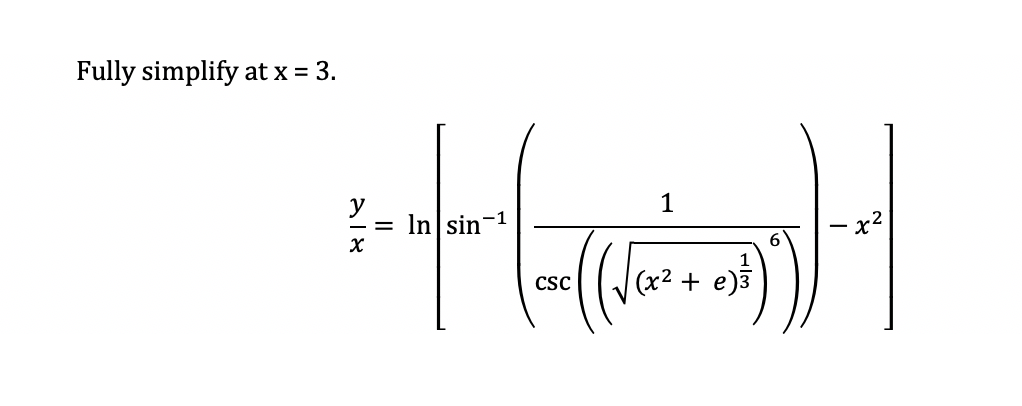

In [27]:
display_image_from_url(IMAGE_PATH)

### Solve the problem above 

In [28]:
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "Fully simplify at x=3?"},
            {"type": "image_url", "image_url": {
                "url": IMAGE_PATH}
            }
        ]}
    ],
    temperature=0.0,
)
str_result = response.choices[0].message.content
#print(response.choices[0].message.content)

In [29]:
#str_result

In [34]:
# Function to render LaTeX as an image
def render_latex(latex, filename):
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.text(0.5, 0.5, f'${latex}$', horizontalalignment='center', verticalalignment='center', fontsize=20)
    ax.axis('off')
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)

In [35]:
# Extract LaTeX expressions from the payload
latex_expressions = re.findall(r'\\\[(.*?)\\\]', str_result, re.DOTALL)

In [36]:
latex_expressions

['\n\\frac{y}{x} = \\ln \\left( \\sin^{-1} \\left( \\frac{1}{\\csc \\left( \\left( \\sqrt{x^2 + e} \\right)^{\\frac{1}{3}} \\right)^6} \\right) - x^2 \\right)\n',
 '\n\\frac{y}{x} = \\ln \\left( \\sin^{-1} \\left( \\frac{1}{\\csc \\left( \\left( \\sqrt{3^2 + e} \\right)^{\\frac{1}{3}} \\right)^6} \\right) - 3^2 \\right)\n',
 '\n3^2 + e = 9 + e\n',
 '\n\\frac{y}{x} = \\ln \\left( \\sin^{-1} \\left( \\frac{1}{\\csc \\left( \\left( \\sqrt{9 + e} \\right)^{\\frac{1}{3}} \\right)^6} \\right) - 9 \\right)\n',
 '\n\\left( \\sqrt{9 + e} \\right)^{\\frac{1}{3}}\n',
 '\n\\frac{y}{x} = \\ln \\left( \\sin^{-1} \\left( \\frac{1}{\\csc (k)^6} \\right) - 9 \\right)\n',
 '\n\\csc(k)^6 = \\left( \\frac{1}{\\sin(k)} \\right)^6 = \\frac{1}{\\sin^6(k)}\n',
 '\n\\frac{1}{\\csc(k)^6} = \\sin^6(k)\n',
 '\n\\frac{y}{x} = \\ln \\left( \\sin^{-1} (\\sin^6(k)) - 9 \\right)\n',
 '\n\\frac{y}{x} = \\ln (k - 9)\n',
 '\n\\frac{y}{x} = \\ln \\left( \\left( \\sqrt{9 + e} \\right)^{\\frac{1}{3}} - 9 \\right)\n',
 '\n\\

In [37]:
# Render each LaTeX expression as an image and display it
for i, latex in enumerate(latex_expressions):
    latex = latex.strip()  # Clean up the LaTeX expression
    filename = f'latex_{i}.png'
    render_latex(latex, filename)
    display(Image(filename))

TypeError: 'module' object is not callable